In [1]:
%reset
%load_ext autoreload
%autoreload 2

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import json
from functions import loader, splt, fitter

In [16]:
data_v1 = loader.load_data( "TwoCodeComparisonscan_20221106/f_0/" )[0]
data_v2 = loader.load_data( "TwoCodeComparisonv2scan_20221106_v2/f_0/" )[0]

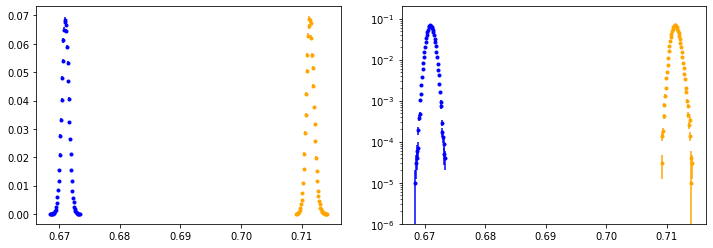

In [21]:
splt.init( 1, 2 )

for tolog in False, True:
    splt.next()

    for d, c in zip( [ data_v1, data_v2 ], [ 'blue', 'orange' ] ):
        rr = d['runned_replicas']
        x, y = fitter.rebin_n( d['h_x'], d['h'], 50 )

        plt.plot( [], [], '.k', label="Data")

        plt.errorbar( x, y, np.sqrt( np.array ( y ) / rr ), color=c, marker='.', ls='' )

    if( tolog ):
        plt.yscale( 'log' )
        plt.ylim( bottom = 1e-6 )



Computed on 100000 replicas
Controllo di normalizzazione: 0.9999899998999989
Computed on 100000 replicas
Controllo di normalizzazione: 0.9999699996999969


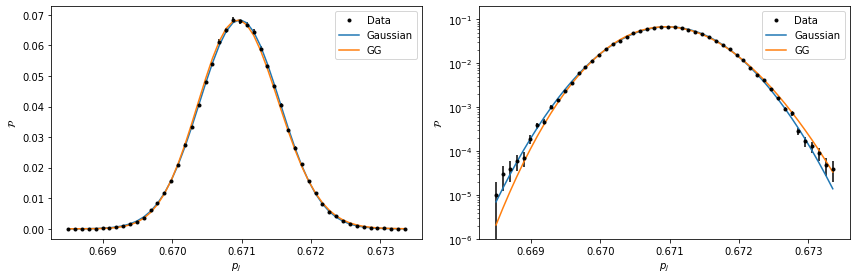

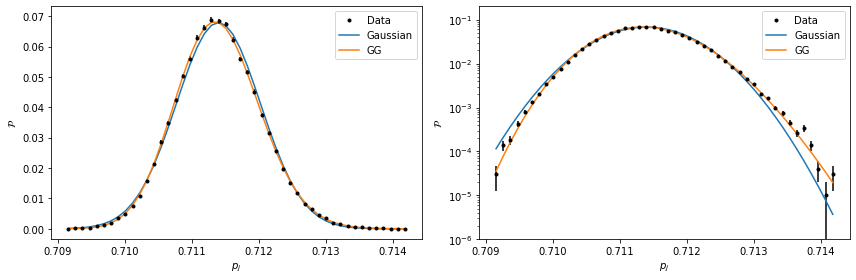

In [23]:
for d in [ data_v1, data_v2]:
    rr = d['runned_replicas']
    print( f"Computed on {rr} replicas" )

    x, y = fitter.rebin_n( d['h_x'], d['h'], 50 )
    fits = fitter.entropyc_fits( d['xs'], x )

    print( f"Controllo di normalizzazione: {np.sum(y)}" )

    splt.init( 1, 2 )

    for tolog in False, True:
        splt.next()

        plt.plot( [], [], '.k', label="Data")

        plt.plot( x, fits['Gauss']['est_y'], label="Gaussian" )
        plt.plot( x, fits['GG']['est_y'], label="GG" )

        plt.errorbar( x, y, np.sqrt( np.array ( y ) / rr ), color='k', marker='.', ls='' )

        plt.legend()
        plt.xlabel(fr"$p_j$")
        plt.ylabel(fr"$\mathcal{{P}}$")

        if( tolog ):
            plt.yscale( 'log' )
            plt.ylim( bottom = 1e-6 )

    plt.tight_layout()